![Imagen](itd.png)

# Analisis De Datos Masivos
## Práctica de laboratorio 4.1.3.6 Clasificación del árbol de decisiones
    
## Nombre Del Docente
### Jose Gabriel Rodriguez Rivas
    
## Francisco javier Favela Najera 

In [2]:
import pandas as pd
import numpy as np
import sqlite3
import matplotlib.pyplot as plt
#import folium_utils
%matplotlib inline

In [3]:
conn=sqlite3.connect('InternetSpeed.db')
cur=conn.cursor()

In [4]:
query='select * from average_speed'
df=pd.read_sql(query,conn)
df.head()

,index,Area,Average_p,Average_u,Average_d
0,0,E07000188,8.451897,21.114114,51.967713
1,1,E07000101,8.317833,20.733028,51.709226
2,2,E09000030,8.983481,22.469438,54.412001
3,3,E09000031,8.956481,22.353593,55.138017
4,4,E09000032,9.144285,22.859003,55.962499


In [5]:
df.drop('index',inplace=True,axis=1)
df.shape

(326, 4)

In [6]:
df.shape

(326, 4)

In [7]:
df.head()

,Area,Average_p,Average_u,Average_d
0,E07000188,8.451897,21.114114,51.967713
1,E07000101,8.317833,20.733028,51.709226
2,E09000030,8.983481,22.469438,54.412001
3,E09000031,8.956481,22.353593,55.138017
4,E09000032,9.144285,22.859003,55.962499


In [8]:
la_json=pd.read_json('LA_poligons.json')
la_json.head()

,LA_code,geometry
0,E06000001,"{u'type': u'MultiPolygon', u'coordinates': [[[..."
1,E06000002,"{u'type': u'MultiPolygon', u'coordinates': [[[..."
2,E06000003,"{u'type': u'MultiPolygon', u'coordinates': [[[..."
3,E06000004,"{u'type': u'MultiPolygon', u'coordinates': [[[..."
4,E06000005,"{u'type': u'Polygon', u'coordinates': [[[-1.63..."


In [76]:
df_promedio=df[['Area','Average_p']]
df_promedio=df_promedio.rename(columns={'Area':'LA_code','Average_p':'Ping_Promedio'})
df_promedio

,LA_code,Ping_Promedio
0,E07000188,8.451897
1,E07000101,8.317833
2,E09000030,8.983481
3,E09000031,8.956481
4,E09000032,9.144285
...,...,...
321,E07000086,8.485722
322,E07000085,8.429606
323,E07000084,8.609286
324,E06000024,8.736193


In [23]:
print(df_promedio.Ping_Promedio.min())
print(df_promedio.Ping_Promedio.max())

0.0
11.999447541819524


In [108]:
bins=np.arange(df_promedio.Ping_Promedio.min(), df_promedio.Ping_Promedio.max(), (df_promedio.Ping_Promedio.max()-df_promedio.Ping_Promedio.min())/6)
bins=list(bins)
bins

[0.0,
 1.9999079236365873,
 3.9998158472731746,
 5.999723770909762,
 7.999631694546349,
 9.999539618182936]

In [40]:
import folium_utils
mymap = folium_utils.folium_top_x_preds_mapper(df_promedio,'la_json','LA_code',Ping_Promedio,bins)

SyntaxError: invalid syntax (folium_utils.py, line 82)

### Error Por Dato Mal Capturado

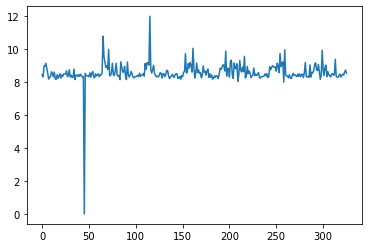

In [43]:
df_promedio.Ping_Promedio.plot()

In [48]:
df_promedio[df_promedio.Ping_Promedio==0]
df_promedio.drop(45,inplace=True)

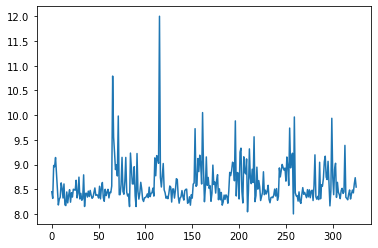

In [49]:
df_promedio.Ping_Promedio.plot()

In [51]:
import folium_utils
mymap = folium_utils.folium_top_x_preds_mapper(df_promedio,'la_json','LA_code',Ping_Promedio,bins)

SyntaxError: invalid syntax (folium_utils.py, line 82)

In [75]:
la_json=la_json.head(300)
df_promedio=df_promedio.head(300)

In [68]:
import folium_utils
mymap = folium_utils.folium_top_x_preds_mapper(df_promedio,la_json,'LA_code','Ping_Promedio',bins)

TypeError: __init__() missing 1 required positional argument: 'geo_data'

In [82]:
import ast
def selected_json_dict_generator(full_list_df, geo_label, geo_label_list):
    allowed_df = full_list_df[full_list_df[geo_label].isin(geo_label_list)]
    
    output_dict =  {'crs':{u'properties': {u'name': u'urn:ogc:def:crs:OGC:1.3:CRS84'}, u'type': u'name'},'type':'FeatureCollection',
                 'features':[{'geometry':ast.literal_eval(allowed_df['geometry'].iloc[i]), 'type':'Feature', 'properties':{ geo_label : allowed_df[geo_label].iloc[i]},'type':'Feature'}
  for i in range(len(allowed_df))]}
    
    return output_dict


In [102]:
world_geo=r'LA_poligons.json'

In [120]:
longlat=[52.061, -1.336]
import folium
df_promedio['Ping_Promedio']=pd.to_numeric(df_promedio['Ping_Promedio'])
top_x_jsons = selected_json_dict_generator(la_json, 'LA_code', df_promedio['LA_code'].values)
map = folium.Map(location=longlat, zoom_start=6)
map.choropleth(geo_data=world_geo, #geographical information for the areas
                  data=df_promedio,columns=['LA_code','Ping_Promedio'],
                  key_on='feature.properties.name', 
                  fill_color='YlOrBr', # color-scale
                  fill_opacity=0.6, # colour opacitity
                  line_opacity=1,threshold_scale=bins,
    reset=True)
map

C:\Users\Francisco Favela\Anaconda3\lib\site-packages\folium\folium.py:415: FutureWarning: The choropleth  method has been deprecated. Instead use the new Choropleth class, which has the same arguments. See the example notebook 'GeoJSON_and_choropleth' for how to do this.
  FutureWarning


ValueError: All values are expected to fall into one of the provided bins (or to be Nan). Please check the `bins` parameter and/or your data.

In [118]:
df_promedio

,LA_code,Ping_Promedio
0,E07000188,8.451897
1,E07000101,8.317833
2,E09000030,8.983481
3,E09000031,8.956481
4,E09000032,9.144285
...,...,...
321,E07000086,8.485722
322,E07000085,8.429606
323,E07000084,8.609286
324,E06000024,8.736193
